In [1]:
#Scipy es un conjunto de herramientas para hacer analisis estadistico de los datos.

from scipy import stats
from sklearn import datasets
import pandas as pd

iris=datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["species"], dtype='category')

stats.ttest_ind(x["sepal length (cm)"],x["petal length (cm)"]) #Ttest_indResult(statistic=13.09835310896086, pvalue=2.8571040695819004e-31)

stats.shapiro(x["sepal length (cm)"]) #shapiro para calcular la distribución normalizada. Nos dice que estos datos SI estan normalizados

stats.bartlett(x["sepal length (cm)"],x["sepal width (cm)"]) #la varianza entre la longitud y el ancho del sepalo es alta

stats.zscore(x["sepal length (cm)"])

stats.linregress(x["sepal length (cm)"],x["petal length (cm)"])

stats.chisquare(x["sepal length (cm)"],x["petal length (cm)"])

Power_divergenceResult(statistic=487.92175255645856, pvalue=1.2234503993947773e-37)

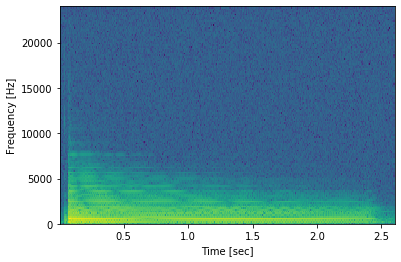

In [16]:
### Audio signal processing
# https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.signal.spectrogram.html
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

fs = 44100 # Sampling frequency (10000 per second)
N = 100000 # Number of samples
frequency = 3000 # Soundwave frequency (Hertz)
time = np.arange(N) / float(fs) # Time in seconds

amp = 2 * np.sqrt(2)
mod = 500*np.cos(2*np.pi*0.5*time)

sigMod = amp * np.sin(2*np.pi*frequency*time)
nse = 0.01 * np.random.random(size=len(time))

x = sigMod # * nse

# https://www.cs.tut.fi/sgn/arg/intro/basics/pia60.wav
sample_rate, samples = wavfile.read('pia60.wav') #www.cs.tut.fi/sgn/arg/intro/basics/pia60.wav
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, np.log(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

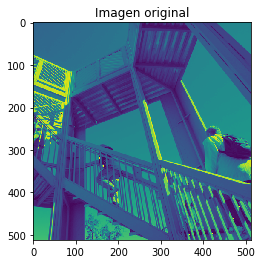

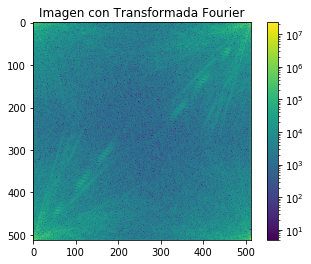

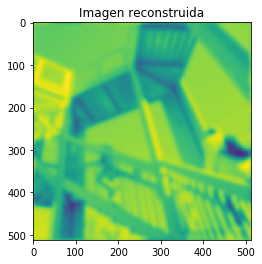

In [19]:
##Image Processing and Fourier Transforms
#las imagenes o sonidos son 'codificadas' con la transformada de fourier (FFT), para convertirlo en un array de datos, que luego se puede recomponer en el otro extremo
from scipy import ndimage, misc #ndimage para procesar imagenes, misc datos de ejemplo
import numpy.fft
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

ascent = misc.ascent() #ascent será un array de con los valores rgb de la imagen, una entrada por pixel

plt.imshow(ascent)
plt.title('Imagen original')
plt.show()

input_ = numpy.fft.fft2(ascent)

plt.figure()
plt.imshow(np.abs(input_),norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Imagen con Transformada Fourier')
plt.show()

result = ndimage.fourier_gaussian(input_, sigma=5)
result = numpy.fft.ifft2(result)

plt.figure()
plt.imshow(np.abs(result),norm=LogNorm(vmin=5))
plt.title('Imagen reconstruida')
plt.show()

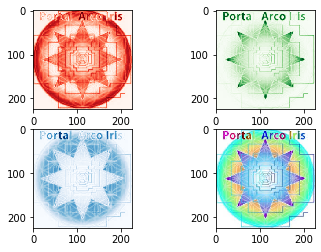

In [15]:
##PROBLEMA
# 1- Cargar un .jpg usando cv2 .imread() que cargara la imagen como objeto
# 2- Escalar datos de 0 a 1, dividiendo los valores en 255 (usa .shape para saber las dimensiones del objeto)
# 3- Extrae los componentes RGB (red, green, blue) como objetos independiente
# 4- Plot las imagenes con plt.imshow()

import cv2
import matplotlib.pyplot as plt


# 1- Cargar un .jpg usando cv2 .imread() que cargara la imagen como objeto
img = cv2.imread('imagen_ejemplo.jpg') # img es un array
# plt.imshow(img) #ver la imagen cargada


# 2- Escalar datos de 0 a 1, dividiendo los valores en 255 (usa .shape para saber las dimensiones del objeto)
img_escalada = img /255.
img_escalada.shape #512, 512, 3 = 512x512 pixeles, valores RGB, .shape para saber las dimensiones de la imagen


# 3- Extrae los componentes RGB (red, green, blue) como objetos independiente
img_rojo = img_escalada[:,:,0] #todas las rows, todas las columnas, pero solo el primer color
img_verde = img_escalada[:,:,1]
img_azul = img_escalada[:,:,2]


# 4- Plot las imagenes con plt.imshow()
plt.subplot(221)
plt.imshow(img_rojo, cmap=plt.cm.Reds_r)
plt.subplot(222)
plt.imshow(img_verde, cmap=plt.cm.Greens_r)
plt.subplot(223)
plt.imshow(img_azul, cmap=plt.cm.Blues_r)
plt.subplot(224)
plt.imshow(img)
plt.show()